In [1]:
#Allow output from every line and import necessary packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import PIL
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
#Read NCAA college basketball efficiency and tempo data from KenPom
KenPom = pd.read_csv("data/KenPomStats_2024.csv")
KenPom
#AdjEM = Adjusted Efficiency margin
#AdjO = Adjusted Offensive Efficiency (points scored per 100 possessions, weighted by opponent)
#AdjD = Adjusted Defensive Efficiency (points allowed per 100 possessions, weighted by opponent)

,Team,Conf,W-L,AdjEM,AdjO,AdjO Rank,AdjD,AdjD Rank,AdjTempo,AdjTempo Rank,Luck,Luck Rank
0,Houston,B12,26-3,31.83,121.1,13,89.3,1,64.0,345,0.034,98
1,Connecticut,BE,26-3,30.43,126.6,4,96.2,17,64.7,332,0.039,89
2,Purdue,B10,26-3,29.66,127.0,2,97.3,21,68.0,170,0.051,66
3,Arizona,P12,23-6,28.04,123.9,6,95.8,14,72.7,15,-0.030,266
4,Tennessee,SEC,23-6,27.85,119.4,17,91.6,3,69.9,66,-0.029,265
...,...,...,...,...,...,...,...,...,...,...,...,...
75,N.C. State,ACC,17-12,10.96,113.1,78,102.1,82,68.6,136,-0.026,255
76,Richmond,A10,22-7,10.84,109.4,136,98.5,34,67.3,213,0.037,94
77,UNLV,MWC,18-10,10.59,113.0,80,102.4,87,65.6,302,0.013,153
78,Syracuse,ACC,20-10,10.31,111.9,89,101.6,74,71.1,35,0.143,3


In [3]:
#Copy urls from sportslogos.net into an iterable list
urls = ['https://www.sportslogos.net/teams/list_by_league/30/NCAA_Division_I_a-c/NCAA_a-c/logos/',
        'https://www.sportslogos.net/teams/list_by_league/31/NCAA_Division_I_d-h/NCAA_d-h/logos/',
        'https://www.sportslogos.net/teams/list_by_league/32/NCAA_Division_I_i-m/NCAA_i-m/logos/',
        'https://www.sportslogos.net/teams/list_by_league/33/NCAA_Division_I_n-r/NCAA_n-r/logos/',
        'https://www.sportslogos.net/teams/list_by_league/34/NCAA_Division_I_s-t/NCAA_s-t/logos/',
        'https://www.sportslogos.net/teams/list_by_league/35/NCAA_Division_I_u-z/NCAA_u-z/logos/']
urls

['https://www.sportslogos.net/teams/list_by_league/30/NCAA_Division_I_a-c/NCAA_a-c/logos/',
 'https://www.sportslogos.net/teams/list_by_league/31/NCAA_Division_I_d-h/NCAA_d-h/logos/',
 'https://www.sportslogos.net/teams/list_by_league/32/NCAA_Division_I_i-m/NCAA_i-m/logos/',
 'https://www.sportslogos.net/teams/list_by_league/33/NCAA_Division_I_n-r/NCAA_n-r/logos/',
 'https://www.sportslogos.net/teams/list_by_league/34/NCAA_Division_I_s-t/NCAA_s-t/logos/',
 'https://www.sportslogos.net/teams/list_by_league/35/NCAA_Division_I_u-z/NCAA_u-z/logos/']

In [4]:
import requests 
from bs4 import BeautifulSoup

#Initialize empty lists for team logo image addresses and team names
team_logos = []
team_names = []

#Define function to return html data to be used for Beautiful Soup html parser
def getdata(url): 
    r = requests.get(url) 
    return r.text

#Iterate through urls and image items in html data and append to corresponding empty list
for url in urls:
    htmldata = getdata(url) 
    soup = BeautifulSoup(htmldata, 'html.parser')
    
    for item in soup.find_all('img'):
        team_logos.append(item['src'])
        team_names.append(item.next_element)

In [5]:
#List comprehension for only gif types (we want only the team logos and not other images on webpage)
team_logos = [x for x in team_logos if 'gif' in x]
len(team_logos) #check length to compare for final parsed team names (in order to create dictionary)

#Begin parsing team names list to remove html nonsense
#Initialize empty list to work with
team_names_split = []

#Split by \t and create list of lists
for i in range(len(team_names)):
    team_names_split.append(team_names[i].split("\t"))

#Initialize final list and remove everything other than team name strings
team_names_final = []

for i in range(len(team_names_split)):
    for j in range(len(team_names_split[i])):
        if len(team_names_split[i][j]) > 6:
            team_names_final.append(team_names_split[i][j])

len(team_names_final) #check length of team names equals length of team logos

#Create team logos DataFrame to merge to KenPom DataFrame
NCAA_team_logos = pd.DataFrame()
NCAA_team_logos["Team Mascot"] = team_names_final
NCAA_team_logos["Path"] = team_logos 

team_merge = ["Alabama Crimson Tide", 
              "Appalachian State Mountaineers",
              "Arizona Wildcats",
              "Auburn Tigers",
              "Brigham Young Cougars",
              "Baylor Bears",
              "Boise State Broncos",
              "Bradley Braves",
              "Butler Bulldogs",
              "Cincinnati Bearcats",
              "Clemson Tigers",
              "Colorado Buffaloes",
              "Colorado State Rams",
              "UConn Huskies",
              "Creighton Bluejays",
              "Dayton Flyers",
              "Drake Bulldogs",
              "Duke Blue Devils",
              "Florida Gators",
              "Florida Atlantic Owls",
              "Gonzaga Bulldogs",
              "Grand Canyon Antelopes",
              "Houston Cougars",
              "Illinois Fighting Illini",
              "Indiana State Sycamores",
              "Iowa Hawkeyes",
              "Iowa State Cyclones",
              "James Madison Dukes",
              "Kansas Jayhawks",
              "Kansas State Wildcats",
              "Kentucky Wildcats",
              "Marquette Golden Eagles",
              "Maryland Terrapins",
              "McNeese State Cowboys",
              "Memphis Tigers",
              "Michigan State Spartans",
              "Minnesota Golden Gophers",
              "Mississippi Rebels",
              "Mississippi State Bulldogs",
              "North Carolina State Wolfpack",
              "Nebraska Cornhuskers",
              "Nevada Wolf Pack",
              "New Mexico Lobos",
              "North Carolina Tar Heels",
              "North Texas Mean Green",
              "Northwestern Wildcats",
              "Ohio State Buckeyes",
              "Oklahoma Sooners",
              "Oregon Ducks",
              "Pittsburgh Panthers",
              "Princeton Tigers",
              "Providence Friars",
              "Purdue Boilermakers",            
              "Richmond Spiders",
              "SMU Mustangs",
              "Saint Marys Gaels",             
              "San Diego State Aztecs",              
              "San Francisco Dons",              
              "Seton Hall Pirates",            
              "South Carolina Gamecocks",              
              "St. Johns Red Storm",
              "Syracuse Orange",
              "TCU Horned Frogs",              
              "Tennessee Volunteers",              
              "Texas Longhorns",              
              "Texas A&M Aggies",              
              "Texas Tech Red Raiders",             
              "California-Irvine Anteaters",              
              "Central Florida Knights",              
              "UNLV Rebels",              
              "Utah Utes",
              "Utah State Aggies",
              "Villanova Wildcats",              
              "Virginia Cavaliers",              
              "Virginia Tech Hokies",              
              "Wake Forest Demon Deacons",              
              "Washington Huskies",              
              "Washington State Cougars",
              "Wisconsin Badgers",              
              "Xavier Musketeers"]

KenPom = KenPom.sort_values("Team")
KenPom["Team Mascot"] = team_merge
KenPom = KenPom.sort_index()

406

406

In [6]:
#Left join logos DataFrame to KenPom data
KenPom = pd.merge(KenPom, NCAA_team_logos, how="left", on="Team Mascot")
KenPom

,Team,Conf,W-L,AdjEM,AdjO,AdjO Rank,AdjD,AdjD Rank,AdjTempo,AdjTempo Rank,Luck,Luck Rank,Team Mascot,Path
0,Houston,B12,26-3,31.83,121.1,13,89.3,1,64.0,345,0.034,98,Houston Cougars,https://content.sportslogos.net/logos/31/700/t...
1,Connecticut,BE,26-3,30.43,126.6,4,96.2,17,64.7,332,0.039,89,UConn Huskies,https://content.sportslogos.net/logos/35/884/t...
2,Purdue,B10,26-3,29.66,127.0,2,97.3,21,68.0,170,0.051,66,Purdue Boilermakers,https://content.sportslogos.net/logos/33/809/t...
3,Arizona,P12,23-6,28.04,123.9,6,95.8,14,72.7,15,-0.030,266,Arizona Wildcats,https://content.sportslogos.net/logos/30/603/t...
4,Tennessee,SEC,23-6,27.85,119.4,17,91.6,3,69.9,66,-0.029,265,Tennessee Volunteers,https://content.sportslogos.net/logos/34/861/t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,N.C. State,ACC,17-12,10.96,113.1,78,102.1,82,68.6,136,-0.026,255,North Carolina State Wolfpack,https://content.sportslogos.net/logos/33/777/t...
76,Richmond,A10,22-7,10.84,109.4,136,98.5,34,67.3,213,0.037,94,Richmond Spiders,https://content.sportslogos.net/logos/33/814/t...
77,UNLV,MWC,18-10,10.59,113.0,80,102.4,87,65.6,302,0.013,153,UNLV Rebels,https://content.sportslogos.net/logos/35/888/t...
78,Syracuse,ACC,20-10,10.31,111.9,89,101.6,74,71.1,35,0.143,3,Syracuse Orange,https://content.sportslogos.net/logos/34/859/t...


In [7]:
#Create new column from reading gif address and save image as jpg file in working directory
import urllib
pd.options.mode.chained_assignment = None

KenPom["New Path"] = "None"*len(KenPom)

for i in range(len(KenPom)):
    KenPom["New Path"][i] = r"C:\Users\owenb\OneDrive\Python Sport Analytics\Module 8 Final Project\Logo_" + KenPom["Team"][i] + ".JPG"
    urllib.request.urlretrieve(KenPom["Path"][i], KenPom["New Path"][i])
    
KenPom["New Path"][0]
KenPom["New Path"][79]

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Houston.JPG',
 <http.client.HTTPMessage at 0x1b06b1ca790>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Connecticut.JPG',
 <http.client.HTTPMessage at 0x1b06b1ddc10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Purdue.JPG',
 <http.client.HTTPMessage at 0x1b06b1de9d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Arizona.JPG',
 <http.client.HTTPMessage at 0x1b06b1dffd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Tennessee.JPG',
 <http.client.HTTPMessage at 0x1b06b1e0850>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Auburn.JPG',
 <http.client.HTTPMessage at 0x1b06b1e10d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Duke.JPG',
 <http.client.HTTPMessage at 0x1b06b1e0fd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Alabama.JPG',
 <http.client.HTTPMessage at 0x1b06b1e1010>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_North Carolina.JPG',
 <http.client.HTTPMessage at 0x1b06b1e0f90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Iowa St..JPG',
 <http.client.HTTPMessage at 0x1b06b1e0ed0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Creighton.JPG',
 <http.client.HTTPMessage at 0x1b06b1e0310>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Illinois.JPG',
 <http.client.HTTPMessage at 0x1b06b1e0890>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Marquette.JPG',
 <http.client.HTTPMessage at 0x1b06b1e1250>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Baylor.JPG',
 <http.client.HTTPMessage at 0x1b06b1e09d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Gonzaga.JPG',
 <http.client.HTTPMessage at 0x1b06b1e22d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_BYU.JPG',
 <http.client.HTTPMessage at 0x1b06b1e2610>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Kansas.JPG',
 <http.client.HTTPMessage at 0x1b06b1e2cd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Kentucky.JPG',
 <http.client.HTTPMessage at 0x1b06b1e21d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_San Diego St..JPG',
 <http.client.HTTPMessage at 0x1b06b1e2f10>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Michigan St..JPG',
 <http.client.HTTPMessage at 0x1b06b1e2050>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Wake Forest.JPG',
 <http.client.HTTPMessage at 0x1b06b1e8150>)

("C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Saint Mary's.JPG",
 <http.client.HTTPMessage at 0x1b06b1e86d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Wisconsin.JPG',
 <http.client.HTTPMessage at 0x1b06b1e88d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Villanova.JPG',
 <http.client.HTTPMessage at 0x1b06b1e8790>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Clemson.JPG',
 <http.client.HTTPMessage at 0x1b06b1e8bd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Texas.JPG',
 <http.client.HTTPMessage at 0x1b06b1e8dd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Dayton.JPG',
 <http.client.HTTPMessage at 0x1b06b1e9610>)

("C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_St. John's.JPG",
 <http.client.HTTPMessage at 0x1b06b1e8450>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Colorado.JPG',
 <http.client.HTTPMessage at 0x1b06b1e98d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Mississippi St..JPG',
 <http.client.HTTPMessage at 0x1b06b1e9910>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Florida.JPG',
 <http.client.HTTPMessage at 0x1b06b1e8dd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_TCU.JPG',
 <http.client.HTTPMessage at 0x1b06b1ea0d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Texas Tech.JPG',
 <http.client.HTTPMessage at 0x1b06b1e9050>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Nebraska.JPG',
 <http.client.HTTPMessage at 0x1b06b1e8090>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Boise St..JPG',
 <http.client.HTTPMessage at 0x1b06b1ea890>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Colorado St..JPG',
 <http.client.HTTPMessage at 0x1b06b1eabd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Oklahoma.JPG',
 <http.client.HTTPMessage at 0x1b06b1e9d50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_New Mexico.JPG',
 <http.client.HTTPMessage at 0x1b06b1e93d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Washington St..JPG',
 <http.client.HTTPMessage at 0x1b06b1eb150>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Florida Atlantic.JPG',
 <http.client.HTTPMessage at 0x1b06b1ea910>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Nevada.JPG',
 <http.client.HTTPMessage at 0x1b06b1eb550>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Utah St..JPG',
 <http.client.HTTPMessage at 0x1b06b1ead50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_South Carolina.JPG',
 <http.client.HTTPMessage at 0x1b06b1eb010>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Pittsburgh.JPG',
 <http.client.HTTPMessage at 0x1b06b1ebb50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Indiana St..JPG',
 <http.client.HTTPMessage at 0x1b06b1ebdd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Northwestern.JPG',
 <http.client.HTTPMessage at 0x1b06b1eb3d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Cincinnati.JPG',
 <http.client.HTTPMessage at 0x1b06b1ebfd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Utah.JPG',
 <http.client.HTTPMessage at 0x1b06b1e9890>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Iowa.JPG',
 <http.client.HTTPMessage at 0x1b06b1ea690>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Maryland.JPG',
 <http.client.HTTPMessage at 0x1b06b1fc110>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Xavier.JPG',
 <http.client.HTTPMessage at 0x1b06b1fc310>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Virginia Tech.JPG',
 <http.client.HTTPMessage at 0x1b06b1fc690>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Ohio St..JPG',
 <http.client.HTTPMessage at 0x1b06b1fce50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Texas A&M.JPG',
 <http.client.HTTPMessage at 0x1b06b1fd050>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Drake.JPG',
 <http.client.HTTPMessage at 0x1b06b1fd2d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_SMU.JPG',
 <http.client.HTTPMessage at 0x1b06b1fd610>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Grand Canyon.JPG',
 <http.client.HTTPMessage at 0x1b06b1fc690>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Washington.JPG',
 <http.client.HTTPMessage at 0x1b06b1fd710>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Providence.JPG',
 <http.client.HTTPMessage at 0x1b06b1fd990>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Seton Hall.JPG',
 <http.client.HTTPMessage at 0x1b06b1fca50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Minnesota.JPG',
 <http.client.HTTPMessage at 0x1b06b1fc090>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_James Madison.JPG',
 <http.client.HTTPMessage at 0x1b06b1fded0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Oregon.JPG',
 <http.client.HTTPMessage at 0x1b06b1fe250>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Princeton.JPG',
 <http.client.HTTPMessage at 0x1b06b1fe0d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_UCF.JPG',
 <http.client.HTTPMessage at 0x1b06b1fd010>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_McNeese St..JPG',
 <http.client.HTTPMessage at 0x1b06b1fe890>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Butler.JPG',
 <http.client.HTTPMessage at 0x1b06b1fe710>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Kansas St..JPG',
 <http.client.HTTPMessage at 0x1b06b1fccd0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Virginia.JPG',
 <http.client.HTTPMessage at 0x1b06b1ff090>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Bradley.JPG',
 <http.client.HTTPMessage at 0x1b06b1ff2d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_San Francisco.JPG',
 <http.client.HTTPMessage at 0x1b06b1fc5d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Memphis.JPG',
 <http.client.HTTPMessage at 0x1b06b1fd7d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Appalachian St..JPG',
 <http.client.HTTPMessage at 0x1b06b1ff690>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_UC Irvine.JPG',
 <http.client.HTTPMessage at 0x1b06b1ff0d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Mississippi.JPG',
 <http.client.HTTPMessage at 0x1b06b1f01d0>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_N.C. State.JPG',
 <http.client.HTTPMessage at 0x1b06b1f0590>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Richmond.JPG',
 <http.client.HTTPMessage at 0x1b06b1fdb90>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_UNLV.JPG',
 <http.client.HTTPMessage at 0x1b06b1fff50>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Syracuse.JPG',
 <http.client.HTTPMessage at 0x1b06b1f0450>)

('C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_North Texas.JPG',
 <http.client.HTTPMessage at 0x1b06b1f0fd0>)

'C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_Houston.JPG'

'C:\\Users\\owenb\\OneDrive\\Python Sport Analytics\\Module 8 Final Project\\Logo_North Texas.JPG'

<IPython.core.display.Javascript object>


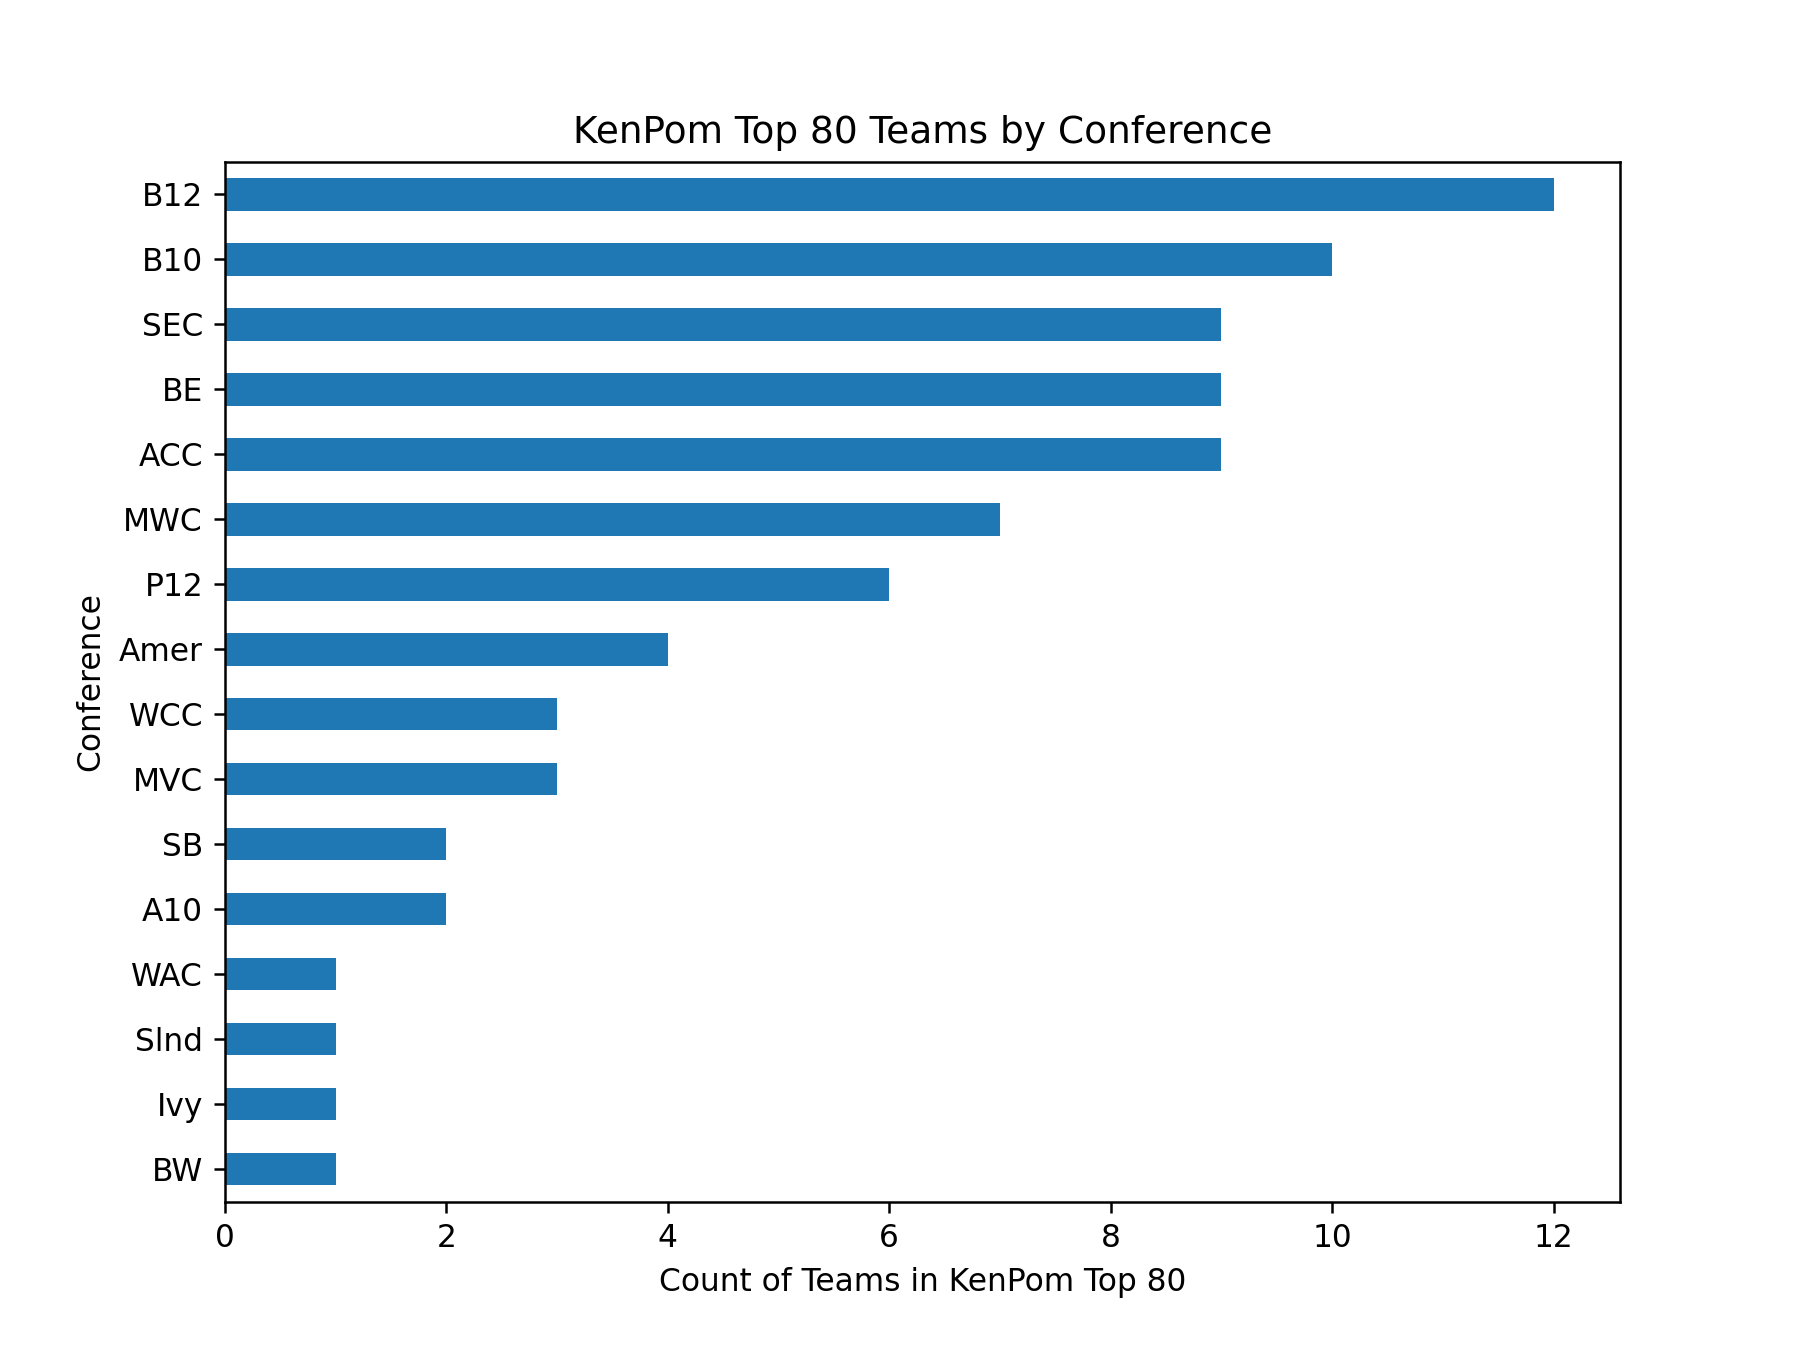

<Axes: title={'center': 'KenPom Top 80 Teams by Conference'}, xlabel='Count of Teams in KenPom Top 80', ylabel='Conference'>

In [8]:
#Top 80 KenPom teams conference distribution
fig, ax = plt.subplots(figsize=(8,6))

KenPom.groupby("Conf").count().Team.sort_values().plot.barh(ax=ax,
                                                            ylabel="Conference", 
                                                            xlabel="Count of Teams in KenPom Top 80", 
                                                            title = "KenPom Top 80 Teams by Conference")

<IPython.core.display.Javascript object>


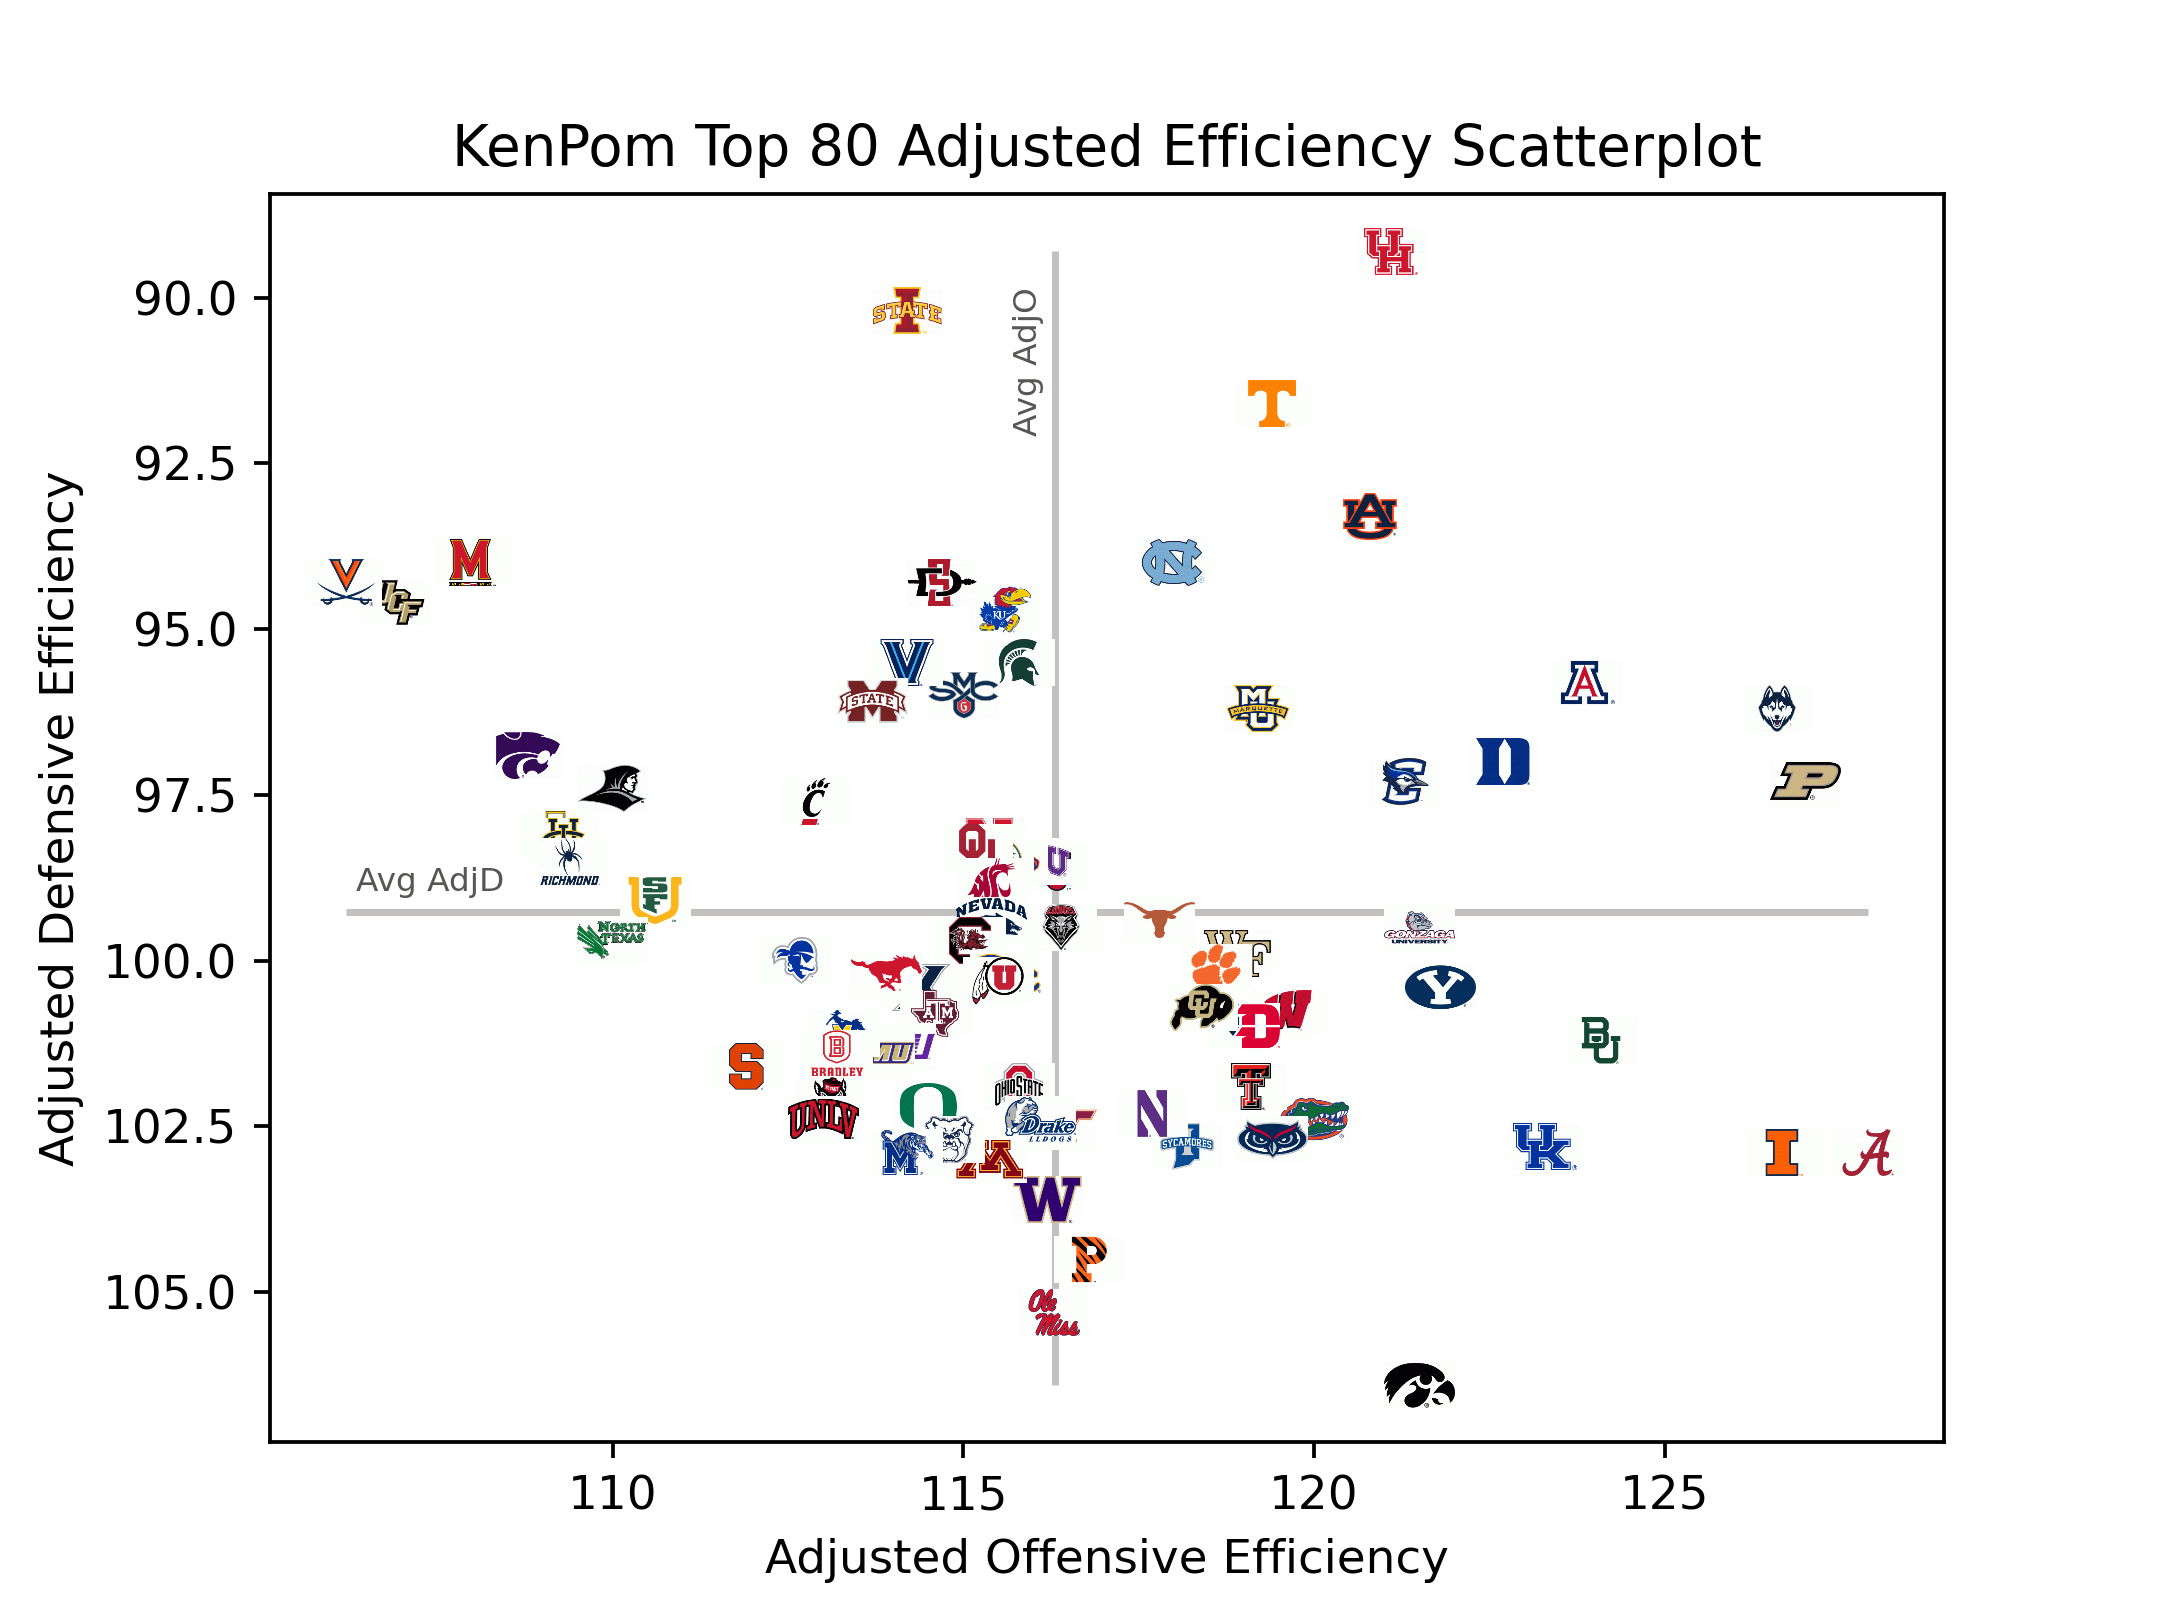

<Axes: title={'center': 'KenPom Top 80 Adjusted Efficiency Scatterplot'}, xlabel='Adjusted Offensive Efficiency', ylabel='Adjusted Defensive Efficiency'>

Text(0.469, 0.735, 'Avg AdjO')

Text(0.165, 0.45, 'Avg AdjD')

In [9]:
fig, ax = plt.subplots(dpi=150) #dpi for higher quality logo resolution

KenPom.plot.scatter(x="AdjO", 
                    y="AdjD", 
                    ylabel="Adjusted Defensive Efficiency", 
                    xlabel="Adjusted Offensive Efficiency", 
                    title="KenPom Top 80 Adjusted Efficiency Scatterplot",
                    ax=ax)

ax.invert_yaxis() #we want better defensive efficiency to be higher on the chart (fewer points allowed)

# Add average lines
plt.hlines(KenPom["AdjD"].mean(), KenPom["AdjO"].min(), KenPom["AdjO"].max(), color='#c2c1c0')
plt.vlines(KenPom["AdjO"].mean(), KenPom["AdjD"].min(), KenPom["AdjD"].max(), color='#c2c1c0')

# Average line labels
fig.text(.469,.735,'Avg AdjO', size=7, color='#575654',rotation=90)
fig.text(.165,.450,'Avg AdjD', size=7, color='#575654')

def getImage(path, zoom = 0.1):
    return OffsetImage(plt.imread(path), zoom=zoom)

#Annotate logos on data points in scatterplot
for x, y, path in zip(KenPom["AdjO"], KenPom["AdjD"], KenPom["New Path"]):
    
    ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
    ax.add_artist(ab)

#Save figure
fig.savefig("data/NCAA_KenPom_March2024.pdf")

In [10]:
#Interactive chart to filter by conference opponents
@interact_manual

def conference_scatter(Conference = list(KenPom.Conf.unique())): #list of conferences
    
    data = KenPom[KenPom.Conf == Conference] #KenPom data is filtered using list input
    
    fig, ax = plt.subplots(dpi=150) #dpi for higher quality logo resolution
    
    data.plot.scatter(x="AdjO",y="AdjD", 
                      ylabel="Adjusted Defensive Efficiency", 
                      xlabel="Adjusted Offensive Efficiency",
                      title=f"KenPom Adjusted Efficiency Scatterplot: {Conference}", #allow title to be changed accordingly
                      ax=ax).invert_yaxis()

    # Add average lines
    plt.hlines(KenPom["AdjD"].mean(), KenPom["AdjO"].min(), KenPom["AdjO"].max(), color='#c2c1c0')
    plt.vlines(KenPom["AdjO"].mean(), KenPom["AdjD"].min(), KenPom["AdjD"].max(), color='#c2c1c0')

    # Average line labels
    fig.text(.465,.735,'Avg AdjO', size=9, color='#575654',rotation=90)
    fig.text(.165,.445,'Avg AdjD', size=9, color='#575654')
    
    #Annotate logos on data points in scatterplot
    for x, y, path in zip(data["AdjO"], data["AdjD"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Conference', options=('B12', 'BE', 'B10', 'P12', 'SEC', 'ACC', 'WC…

In [11]:
#See values at a quick glance for reference to chart above
@interact
def conference_select(Conference = list(KenPom.Conf.unique())):
    return(KenPom[KenPom.Conf == Conference][["Team Mascot", "W-L","AdjEM","AdjO","AdjD","AdjTempo","Luck"]])

interactive(children=(Dropdown(description='Conference', options=('B12', 'BE', 'B10', 'P12', 'SEC', 'ACC', 'WC…

In [12]:
#Tempo correlation with efficiency metrics
@interact
def rtempo(Efficiency=["AdjEM","AdjO", "AdjD"], 
           Tempo="AdjTempo"):
    return(f"Correlation: {KenPom[Tempo].corr(KenPom[Efficiency])}")

interactive(children=(Dropdown(description='Efficiency', options=('AdjEM', 'AdjO', 'AdjD'), value='AdjEM'), Te…

In [13]:
#Tempo scatterplot versus various efficiency metrics
@interact_manual

def tempo_plot(Efficiency = ["AdjEM", "AdjO", "AdjD"]):
    
    fig, ax = plt.subplots()
    
    #if statement to assign ylabel for selected efficiency metric
    if f"{Efficiency}" == "AdjEM": 
        ylabel = "Adjusted Efficiency Margin"
    elif f"{Efficiency}" == "AdjD":
        ylabel = "Adjusted Defensive Efficiency"
    else:
        ylabel = "Adjusted Offensive Efficiency"
        
    KenPom.plot.scatter(x="AdjTempo",y=f"{Efficiency}", 
                      ylabel=ylabel, 
                      xlabel="Adjusted Tempo",
                      title="KenPom Adjusted Efficiency vs Tempo Scatterplot",
                      ax=ax)

interactive(children=(Dropdown(description='Efficiency', options=('AdjEM', 'AdjO', 'AdjD'), value='AdjEM'), Bu…

In [14]:
@interact_manual

def tempo_conf_scatter(Efficiency = ["AdjEM", "AdjO", "AdjD"], 
                  Conference = list(KenPom.Conf.unique())):
    
    data = KenPom[KenPom.Conf == Conference]
    
    fig, ax = plt.subplots(dpi=150)
    
    if f"{Efficiency}" == "AdjEM": 
        ylabel = "Adjusted Efficiency Margin"
    elif f"{Efficiency}" == "AdjD":
        ylabel = "Adjusted Defensive Efficiency"
    else:
        ylabel = "Adjusted Offensive Efficiency"
    
    data.plot.scatter(x="AdjTempo",y=f"{Efficiency}", 
                      ylabel= ylabel, 
                      xlabel="Adjusted Tempo",
                      title=f"KenPom Adjusted Efficiency vs Tempo Scatterplot: {Conference}",
                      ax=ax)
    
    #Invert y-axis if defensive efficiency is selected
    if f"{Efficiency}" == "AdjD":
        ax.invert_yaxis()
    else: None

    for x, y, path in zip(data["AdjTempo"], data[f"{Efficiency}"], data["New Path"]):
    
        ab = AnnotationBbox(getImage(path), (x, y), frameon=False)
        ax.add_artist(ab)

interactive(children=(Dropdown(description='Efficiency', options=('AdjEM', 'AdjO', 'AdjD'), value='AdjEM'), Dr…